# K Means

K means is a classification ML algorithm that works as follows:

1. Intialization of k centroids (randomly chosen)
2. Assigning each point in the data set to its closest cluster (via a distance  
parameter to the centroid such as the euclidean distance)
3. Moving the centroids of the clusters

In K means clustering, we keep iterating through the set until our centroids  
have no longer changed (i.e they have converged), and every point in the data  
set is assigned to a certain cluster. 

K means is a discriminative method, that hard assigns data points to a given  
cluster.

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from copy import deepcopy
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Since we need a distance metric, to measure the distance to the center of the  
clusters, we can write it down as a helper function pre-hand to aid with  
calculations, in the implementation below I simply implement the euclidean  
distance, but many metrics such as the manhattan distance and more distance  
metrics can be used.

In [0]:
def eucl_dist(p1, p2):
    axis_val = 0
    if len(p1.shape) != 1:
        axis_val = 1
    return np.linalg.norm(np.subtract(p1,p2),axis=axis_val)

In [0]:
def k_means(data,k):
    features = data
    dim1 = features.shape[0]
    dim2 = features.shape[1]
    #we will now generate random centers
    mean = np.mean(features, axis = 0)
    std = np.std(features, axis = 0)
    centroids = np.random.randn(k,dim2)*std + mean
    len_centroids= centroids.shape
    centroids_old= np.zeros((len_centroids))
    centroids_new= deepcopy(centroids)
    diff= np.linalg.norm(np.subtract(centroids_new,centroids_old))
    clusters= np.zeros((len_centroids))
    euclidean_distances= np.zeros((dim1,k))
    
    while diff!=0:
        for num in range(k):
            euclidean_distances[:,num] = np.linalg.norm(
                np.subtract(features,centroids[num]),axis=1)
        clusters= np.argmin(euclidean_distances, axis = 1)
        centroids_old= deepcopy(centroids_new)
        for num in range(k):
            centroids_new[num]= np.mean(features[clusters==num],axis=0)
        diff= np.linalg.norm(np.subtract(centroids_new,centroids_old))
    labels= np.zeros(len(features))
    colors= [0,1,2,3,4,5,6,7,8,9,10,11]
    for i in range(len(features)):
        dist= np.zeros((len(centroids_new)))
        for c in range(len(centroids_new)):
            dist[c]= np.linalg.norm(np.subtract(features[i],centroids_new[c]), 
                                    axis=0)
        index=np.argmin(dist)
        labels[i]= colors[index]
    return labels,centroids_new

Let us now load an example dataset

Text(0.5, 1.0, 'Plotting the data')

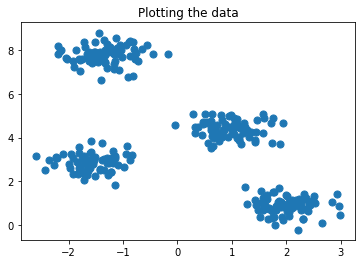

In [9]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Plotting the data")

Text(0.5, 1.0, 'K means clustering using four clusters')

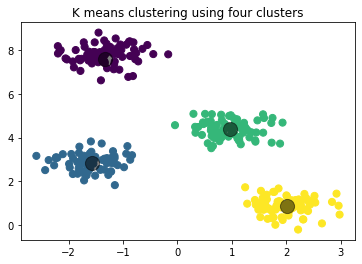

In [10]:
y_predict, centroids =k_means(X,4)
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.title("K means clustering using four clusters")

As we can see the algoithm worked! Here since the data was pretty clearly in  
four clusters, we picked k to be 4, let us now look at a case where the data  
is more overlapped, and plot a few variations of k, to see which looks best.

Text(0.5, 1.0, 'Plotting the data')

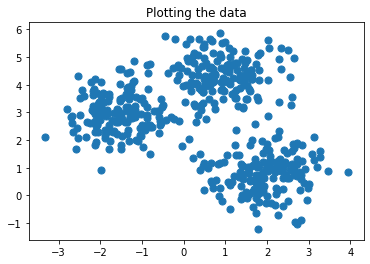

In [13]:
X_2, y_true_2 = make_blobs(n_samples=500, centers=3,
                       cluster_std=0.7, random_state=0)
plt.scatter(X_2[:, 0], X_2[:, 1], s=50)
plt.title("Plotting the data")

Text(0.5, 1.0, 'K means clustering using four clusters')

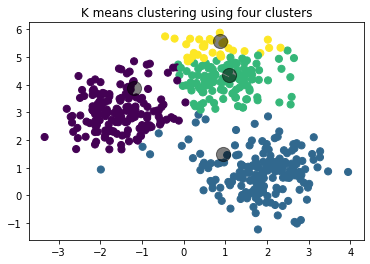

In [24]:
y_predict_2, centroids_2 =k_means(X_2,4)
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_predict_2, s=50, cmap='viridis')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='black', s=200, alpha=0.5)
plt.title("K means clustering using four clusters")

As we can see, using a k value of 4 does not work super well in this case, so  
let us try another value and see what happens

Text(0.5, 1.0, 'K means clustering using three clusters')

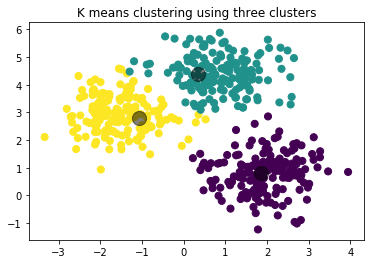

In [25]:
y_predict_2, centroids_2 =k_means(X_2,3)
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_predict_2, s=50, cmap='viridis')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='black', s=200, alpha=0.5)
plt.title("K means clustering using three clusters")

Text(0.5, 1.0, 'K means clustering two clusters')

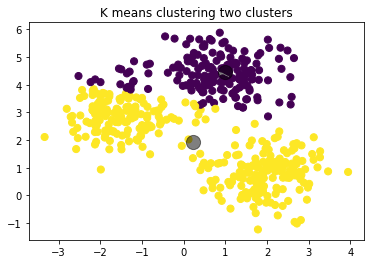

In [26]:
y_predict_2, centroids_2 =k_means(X_2,2)
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_predict_2, s=50, cmap='viridis')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='black', s=200, alpha=0.5)
plt.title("K means clustering two clusters")

Here we see slightly more distinct clusters shapes in the case of k being equal  
to 3, but too much overlap in the case of k being equal to 2, is there a way to  
quantitavely analyze this, without depending on a qualitative analysis?

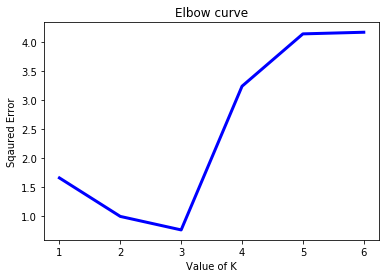

In [30]:
cost =[] 
for i in range(1, 7): 
    y_predict_2, centroids_2 =k_means(X_2,i)
    cost.append(mean_squared_error(y_true_2, y_predict_2))    

plt.plot(range(1, 7), cost, color ='b', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error") 
plt.title('Elbow curve')
plt.show() 

What we see above is an elbow curve, a very common metric to determine the k  
value in k-means, k nearest neighbours, and many other machine learning  
methods. It helps quantitatively determine the correct value of k, by picking  
the value of k that froms the elbow. Even though it may look like a toss up  
between the values of 3 and 4, it is clear from the elbow curve that 3 is the  
best value for this particular set.